In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

class OptimizedANFIS:
    def __init__(self, n_inputs, n_rules, mf_type="gaussian", learning_rate=0.01):
        self.n_inputs = n_inputs
        self.n_rules = n_rules
        self.mf_type = mf_type
        self.learning_rate = learning_rate

        # Initialize membership function parameters
        self.mf_params = self._initialize_mf_params().astype(np.float32)

        # Initialize consequent parameters
        self.consequent_params = np.random.rand(self.n_rules, self.n_inputs + 1).astype(np.float32)

    def _initialize_mf_params(self):
        if self.mf_type == "gaussian":
            return np.random.rand(self.n_inputs, self.n_rules, 2)
        elif self.mf_type == "triangular":
            return np.random.rand(self.n_inputs, self.n_rules, 3)
        else:
            raise ValueError("Invalid membership function type. Choose 'gaussian' or 'triangular'.")

    def _membership_function(self, X, params):
        if self.mf_type == "gaussian":
            c, sigma = params[..., 0], params[..., 1]
            return np.exp(-0.5 * ((X[..., np.newaxis] - c) / sigma) ** 2)
        elif self.mf_type == "triangular":
            a, b, c = params[..., 0], params[..., 1], params[..., 2]
            left = (X[..., np.newaxis] - a) / (b - a)
            right = (c - X[..., np.newaxis]) / (c - b)
            return np.maximum(0, np.minimum(left, right))
        else:
            raise ValueError("Invalid membership function type.")

    def _fuzzy_inference(self, X):
        mf_values = self._membership_function(X, self.mf_params)
        firing_strengths = np.prod(mf_values, axis=1)
        firing_strengths_sum = np.sum(firing_strengths, axis=1, keepdims=True) + 1e-8
        return firing_strengths / firing_strengths_sum

    def predict(self, X):
        firing_strengths = self._fuzzy_inference(X)
        X_with_bias = np.hstack([X, np.ones((X.shape[0], 1))])
        rule_outputs = np.dot(X_with_bias, self.consequent_params.T)
        outputs = np.sum(firing_strengths * rule_outputs, axis=1)
        return outputs

    def train(self, X, y, n_iterations=5000, batch_size=100):
        n_samples = X.shape[0]
        losses = []
        for iteration in range(n_iterations):
            indices = np.random.permutation(n_samples)
            X_shuffled, y_shuffled = X[indices], y[indices]

            batch_losses = []
            for start in range(0, n_samples, batch_size):
                end = start + batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                # Forward pass
                firing_strengths = self._fuzzy_inference(X_batch)
                X_with_bias = np.hstack([X_batch, np.ones((X_batch.shape[0], 1))])
                rule_outputs = np.dot(X_with_bias, self.consequent_params.T)
                outputs = np.sum(firing_strengths * rule_outputs, axis=1)

                # Compute error and gradient update
                error = y_batch - outputs
                mse = np.mean(error ** 2)
                batch_losses.append(mse)

                grad = np.dot(firing_strengths.T, (error[:, np.newaxis] * X_with_bias))
                self.consequent_params += self.learning_rate * grad

            losses.append(np.mean(batch_losses))
            if iteration % 500 == 0:
                print(f"Iteration {iteration}, MSE: {losses[-1]}")

        return losses


# Load and normalize data
train_data = pd.read_csv("train_data.csv")
test_data = pd.read_csv("test_data.csv")

X_train = train_data.drop(columns=["Power"]).values.astype(np.float32)
y_train = train_data["Power"].values.astype(np.float32)
X_test = test_data.drop(columns=["Power"]).values.astype(np.float32)
y_test = test_data["Power"].values.astype(np.float32)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
    

Iteration 0, MSE: 0.047855935124727626
Iteration 500, MSE: 0.03585023692449108
Test MSE: 0.03580220816279059


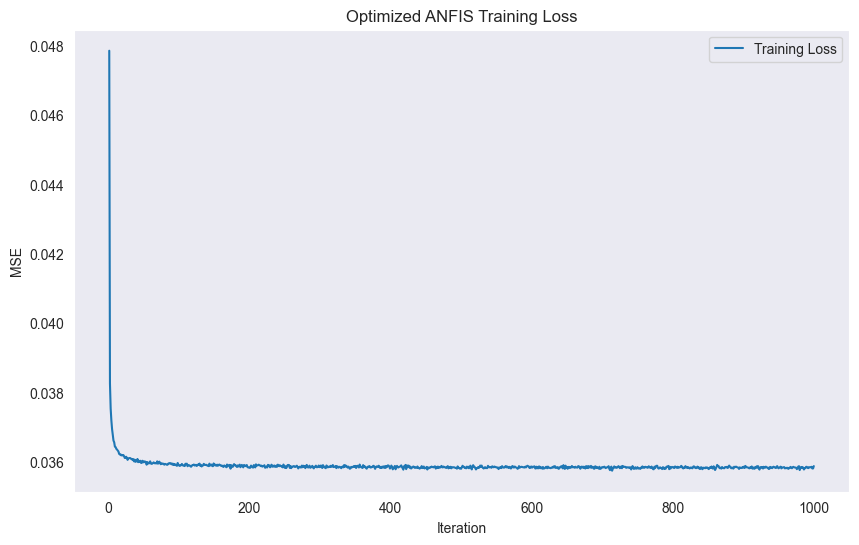

In [2]:

# Train Optimized ANFIS
anfis_model = OptimizedANFIS(n_inputs=X_train_scaled.shape[1], n_rules=10, mf_type="gaussian", learning_rate=0.01)
losses = anfis_model.train(X_train_scaled, y_train, n_iterations=1000, batch_size=50)

# Predict and evaluate
y_pred = anfis_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Optimized ANFIS Training Loss")
plt.legend()
plt.grid()
plt.show()
    

Iteration 0, MSE: 0.050324064013972526
Iteration 500, MSE: 0.03514696623077374
Test MSE: 0.03488897340561225


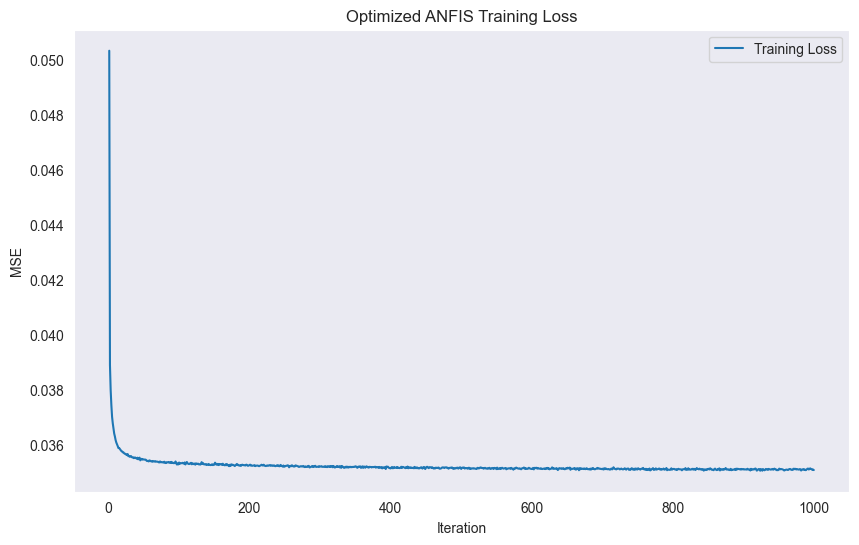

In [3]:

# Train Optimized ANFIS
anfis_model = OptimizedANFIS(n_inputs=X_train_scaled.shape[1], n_rules=20, mf_type="gaussian", learning_rate=0.01)
losses = anfis_model.train(X_train_scaled, y_train, n_iterations=1000, batch_size=50)

# Predict and evaluate
y_pred = anfis_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Optimized ANFIS Training Loss")
plt.legend()
plt.grid()
plt.show()

Iteration 0, MSE: 0.057417675974492266
Iteration 500, MSE: 0.03434864962174841
Test MSE: 0.03437351917981784


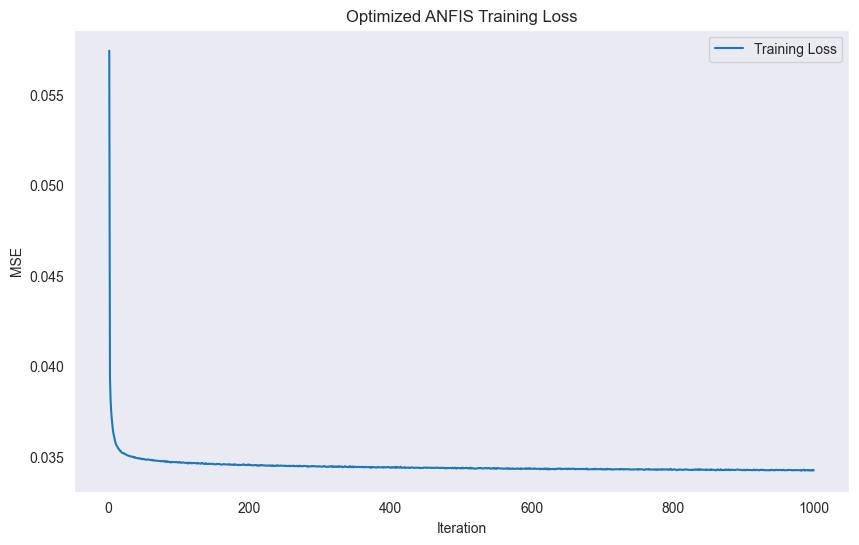

In [4]:

# Train Optimized ANFIS
anfis_model = OptimizedANFIS(n_inputs=X_train_scaled.shape[1], n_rules=30, mf_type="gaussian", learning_rate=0.01)
losses = anfis_model.train(X_train_scaled, y_train, n_iterations=1000, batch_size=50)

# Predict and evaluate
y_pred = anfis_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

# Plot the training loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(losses) + 1), losses, label="Training Loss")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Optimized ANFIS Training Loss")
plt.legend()
plt.grid()
plt.show()

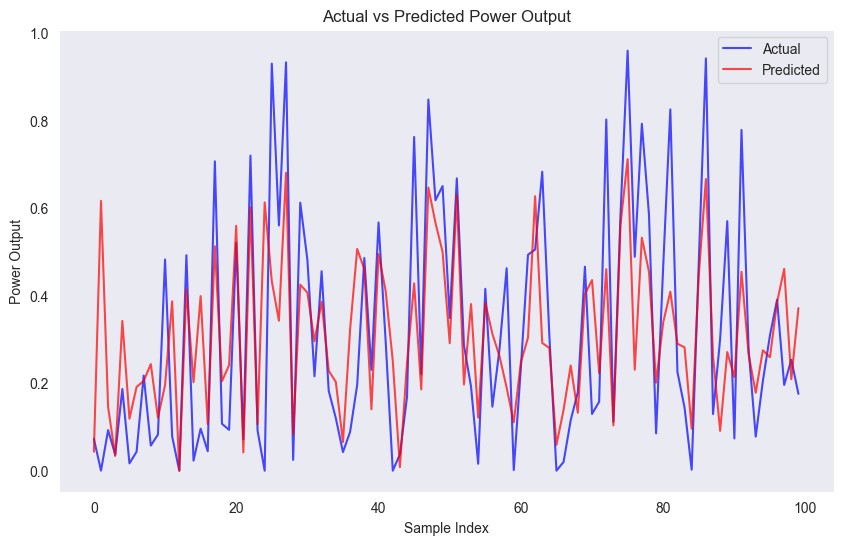

In [6]:
# Plot Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label="Actual", alpha=0.7, color="blue")
plt.plot(y_pred[:100], label="Predicted", alpha=0.7, color="red")
plt.xlabel("Sample Index")
plt.ylabel("Power Output")
plt.title("Actual vs Predicted Power Output")
plt.legend()
plt.grid()
plt.show()
